In [ ]:
!git clone https://github.com/farahfarina/alibabas.git

Cloning into 'alibabas'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), done.


### GROUP PROJECT<br>
TOPIC: ETL FOR ALIBABA<br>

---

Group Members:<br>
1. FARAH FARINA BINTI AFINDY A188500
2. KHAIRINA BATRISYIA BINTI KHAIRUL ANUAR A193035
3. HANIS NABIHAH BINTI ARIFIN A188202
4. WAN ALEEYA FITRIAH BINTI WAN SHAMSHOL A189547 <br>

In [ ]:
!pip install lxml
!pip install requests beautifulsoup4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
!git clone <https://github.com/farahfarina/alibaba>
%cd <https://github.com/farahfarina/alibaba>

!git add .
!git commit -m "Add Colab notebook and CSV file"

!git push

Names = []
Price = []
Min = []
Company = []
Origin = []
Ratings = []
Verified = []
ProductFeaturesList = []

# Set up the User-Agent header
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Function to get soup object
def get_soup(url_with_page):
    response = requests.get(url_with_page, headers=headers)
    return BeautifulSoup(response.content, 'lxml')

# Base URL without the page number
base_url = "https://www.alibaba.com/trade/search?SearchText=Women's%20Perfume"

# Loop through a certain number of pages
for page in range(1, 60):  # Adjust the range as needed
    # Modify the URL with the current page number
    url_with_page = f"{base_url}&page={page}"
    soup = get_soup(url_with_page)

    # Process the page here...
    # For example, find all product names
    names = soup.find_all("h2", class_="search-card-e-title")
    for i in names:
        n = i.text
        Names.append(n)

    prices = soup.find_all("div", class_ = "search-card-e-price-main")
    for i in prices:
      n = i.text
      Price.append(n)

    min = soup.find_all("div", class_ = "search-card-m-sale-features__item")
    for i in min:
      n = i.text
      Min.append(n)

    company = soup.find_all("a", class_ = "search-card-e-company margin-bottom-12")
    for i in company:
      n = i.text
      Company.append(n)

    origin = soup.find_all("a", class_ = "search-card-e-supplier__year")
    for i in origin:
      n = i.text
      Origin.append(n)

    ratings = soup.find_all("span", class_ = "search-card-e-review")
    for i in ratings:
      n = i.text
      Ratings.append(n)

    productFeatList = soup.find_all("div", class_="search-card-m-product-features-list")
    for i in productFeatList:
      n = i.text
      ProductFeaturesList.append(n)


a = {
    "Names": Names,
    "Price": Price,
    "Minimum": Min,
    "Company": Company,
    "Origin": Origin,
    "Ratings": Ratings,
    "Product Features List":ProductFeaturesList
}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

print(df)

df.to_csv("alibaba_perfume.csv", index=False)
# Optional: Sleep to avoid overwhelming the server
time.sleep(1)


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/farahfarina/alibaba>'
[Errno 2] No such file or directory: '<https://github.com/farahfarina/alibaba>'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
                                                 Names             Price  \
0    High Quality Lady Original Brand Designer Ligh...     $1.85 - $2.05   
1    Newest fresh and floral body mist long lasting...     $0.95 - $1.09   
2        Fast Delivery Sau-vage Fresh Scent 30mL Spray     $4.30 - $4.80   
3    Clean fragrance natural perfume repair moistur...  $90.00 - $100.00   
4    Victoria's Spray Perfume 50ml Women's Brand Pe...     $1.80 - $2.30   
..                                                 ...               ...   
387                         

In [ ]:
import pandas as pd
import re

file_path = "alibaba_perfume.csv"
df = pd.read_csv(file_path)

def extract_minimum_order(text):
    text = str(text)
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None

for col in ['Minimum']:
    df = df[~df[col].str.contains("Shipping|Delivery", na=False)]
    df[col] = df[col].apply(extract_minimum_order)

df = df.rename(columns={'Minimum': 'Minimum Order (Pieces)'})


def extract_numeric(text):
    text = str(text)
    return [float(val) for val in re.findall(r'\d+\.\d+', text)]

lowest_prices = []
highest_prices = []

for price_text in df['Price']:
    numeric_values = extract_numeric(price_text)
    if len(numeric_values) == 1:
        lowest_price = highest_price = float(numeric_values[0])
    elif len(numeric_values) == 2:
        lowest_price, highest_price = map(float, numeric_values)
    lowest_prices.append(lowest_price)
    highest_prices.append(highest_price)

df['Lowest Bulk Price (in $)'] = lowest_prices
df['Highest Bulk Price (in $)'] = highest_prices

ratings = []
num_reviews = []
for rating_text in df['Ratings']:
    rating_match = re.search(r'(\d+\.\d+)/5.0 \((\d+) reviews\)', str(rating_text))
    if rating_match:
        rating, num_review = map(float, rating_match.groups())
        num_review = int(num_review)
    else:
        rating = num_review = None

    ratings.append(rating)
    num_reviews.append(num_review)

df['Rating'] = ratings
df['Number of Reviews'] = df['Ratings'].str.extract(r'(\d+) reviews').astype('Int64')

# Impute missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Rating'] = df['Rating'].round(2)
df['Number of Reviews'].fillna(df['Number of Reviews'].median(), inplace=True)
df['Lowest Bulk Price (in $)'].fillna(df['Lowest Bulk Price (in $)'].mean(), inplace=True)
df['Highest Bulk Price (in $)'].fillna(df['Highest Bulk Price (in $)'].mean(), inplace=True)

missing_origin = df['Origin'].isnull()
df['Years on Amazon'] = df['Origin'].apply(lambda x: re.search(r'(\d+) yr', str(x)).group(1) if pd.notnull(x) and re.search(r'(\d+) yr', str(x)) else None)

country_mapping = {
    'CN': 'China', 'MY': 'Malaysia', 'JP': 'Japan', 'TW': 'Taiwan',
    'TR': 'Turkey', 'PK': 'Pakistan', 'IT': 'Italy', 'ID': 'Indonesia',
    'AE': 'United Arab Emirates', 'EG': 'Egypt', 'IN': 'India'
}
df['Supplier Country Origin'] = df['Origin'].apply(lambda x: re.search(r'yrs(\w+)', str(x)).group(1) if pd.notnull(x) and re.search(r'yrs(\w+)', str(x)) else None)
df['Supplier Country Origin'] = df['Supplier Country Origin'].replace(country_mapping)
df['Supplier Country Origin'].fillna('None', inplace=True)

df = df.dropna(subset=['Names', 'Minimum Order (Pieces)'])
df = df.drop(['Ratings', 'Origin', 'Price', 'Product Features List'], axis=1)

cleaned_file_path = "alibaba_perfume_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)



HISTOGRAM TO CHECK PRODUCT'S SUPPLIER COUNTRY ORIGIN AND ITS FREQUENCY using pre-cleaned data

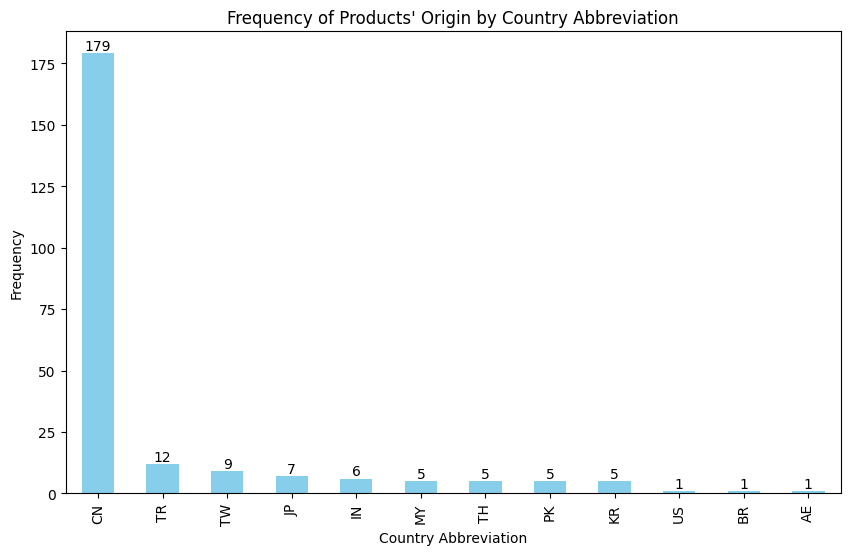

In [ ]:

import matplotlib.pyplot as plt

file_path = "alibaba_perfume.csv"
df = pd.read_csv(file_path)

df['CountryAbbreviation'] = df['Origin'].str.extract(r'([A-Z]{2})')
country_counts = df['CountryAbbreviation'].value_counts()

plt.figure(figsize=(10, 6))
ax = country_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Products\' Origin by Country Abbreviation')
plt.xlabel('Country Abbreviation')
plt.ylabel('Frequency')

for i, v in enumerate(country_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


HISTOGRAM TO CHECK PRODUCT'S SUPPLIER COUNTRY ORIGIN AND ITS FREQUENCY using cleaned data

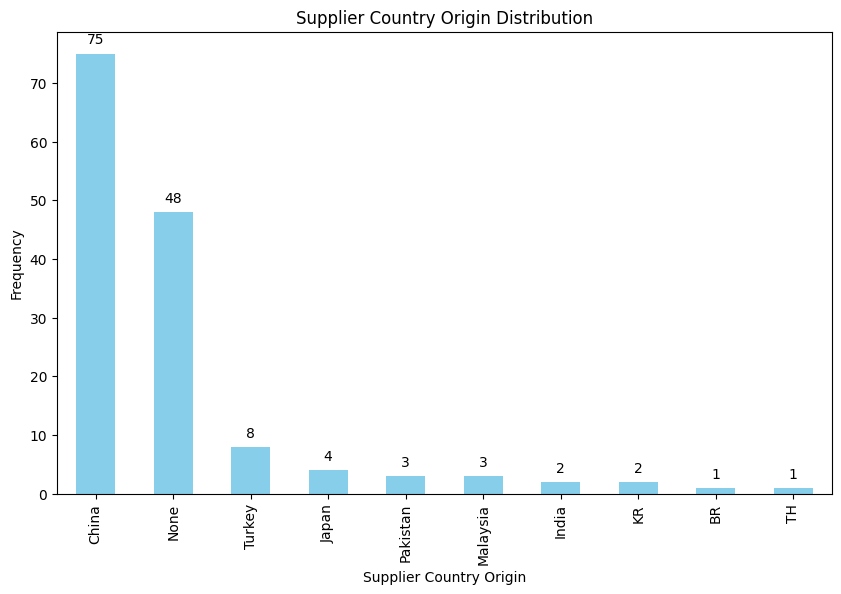

In [ ]:
import matplotlib.pyplot as plt

file_path = "alibaba_perfume_cleaned.csv"
df = pd.read_csv(file_path)

# df_filtered = df[df['Supplier Country Origin'] != 'None']

plt.figure(figsize=(10, 6))
ax = df['Supplier Country Origin'].value_counts().plot(kind='bar', color='skyblue') # kalau nak display sekali products yg takde supplier country origin
# ax = df_filtered['Supplier Country Origin'].value_counts().plot(kind='bar', color='skyblue') # kalau xnak display products yg takde supplier country origin

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Supplier Country Origin Distribution')
plt.xlabel('Supplier Country Origin')
plt.ylabel('Frequency')
plt.show()

SCATTERPLOT TO COMPARE PRODUCT'S NUMBER OF REVIEWS AND YEARS ON AMAZON using pre-cleaned data

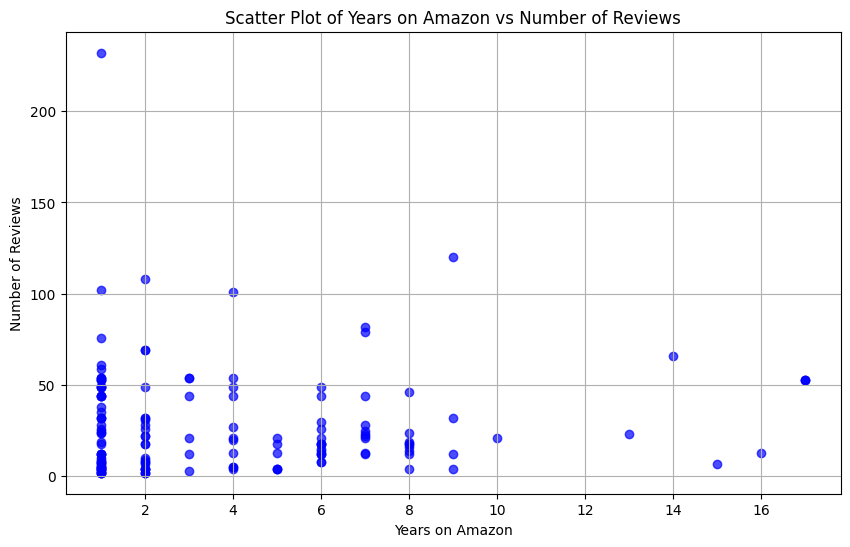

In [ ]:

file_path = "alibaba_perfume.csv"
df = pd.read_csv(file_path)
df['Years on Amazon'] = df['Origin'].apply(lambda x: int(re.search(r'(\d+) yr', str(x)).group(1)) if pd.notnull(x) and re.search(r'(\d+) yr', str(x)) else None)
df['Number of Reviews'] = df['Ratings'].apply(lambda x: int(re.search(r'(\d+) reviews', str(x)).group(1)) if pd.notnull(x) and re.search(r'(\d+) reviews', str(x)) else None)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Years on Amazon'], df['Number of Reviews'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Years on Amazon vs Number of Reviews')
plt.xlabel('Years on Amazon')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

SCATTERPLOT TO COMPARE PRODUCT'S NUMBER OF REVIEWS AND YEARS ON AMAZON using cleaned data

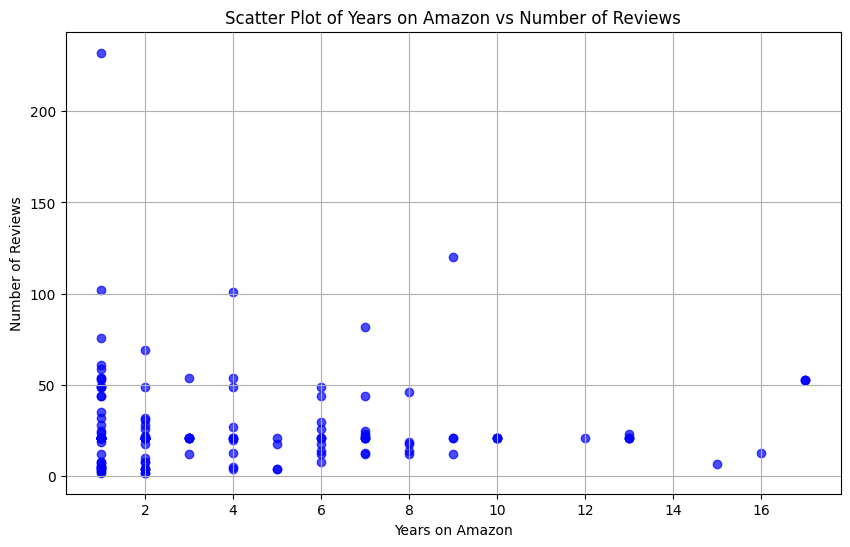

In [ ]:

cleaned_file_path = "alibaba_perfume_cleaned.csv"
df = pd.read_csv(cleaned_file_path)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Years on Amazon'], df['Number of Reviews'], color='blue', alpha=0.7)
plt.title('Scatter Plot of Years on Amazon vs Number of Reviews')
plt.xlabel('Years on Amazon')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


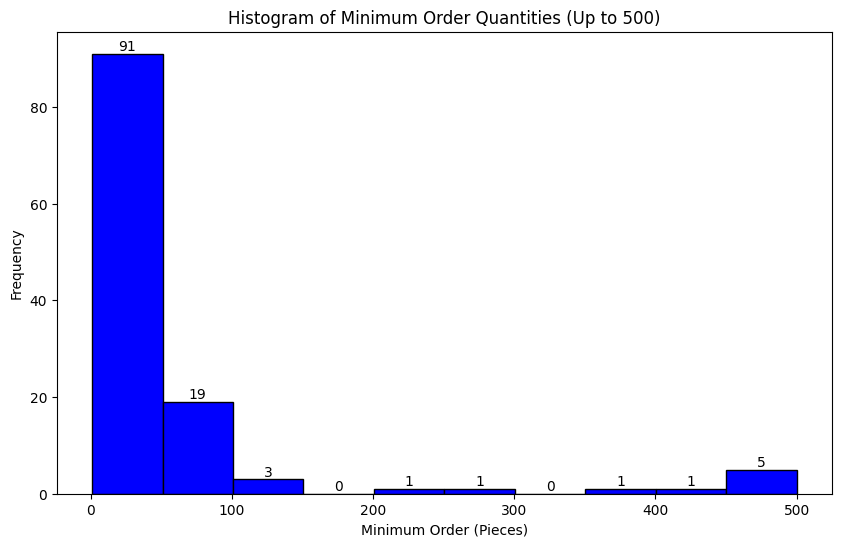

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'alibaba_perfume_cleaned.csv'
df = pd.read_csv(file_path)

# Check if the 'Minimum Order (Pieces)' column exists
if 'Minimum Order (Pieces)' in df.columns:
    # Filter out rows where 'Minimum Order (Pieces)' exceeds 500
    df_filtered = df[df['Minimum Order (Pieces)'] <= 500]

    # Plotting the histogram with filtered data
    plt.figure(figsize=(10, 6))
    hist, bins, _ = plt.hist(df_filtered['Minimum Order (Pieces)'], bins=10, color='blue', edgecolor='black')
    plt.title('Histogram of Minimum Order Quantities (Up to 500)')
    plt.xlabel('Minimum Order (Pieces)')
    plt.ylabel('Frequency')

    # Display the counts above the bars
    for i in range(len(hist)):
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

    plt.show()

else:
    print("Column 'Minimum Order (Pieces)' not found in the dataset.")


Horizontal Bar Chart for the Average Rating by Company using Pre-Cleaned Data (Compare the average ratings of products from different companies.)

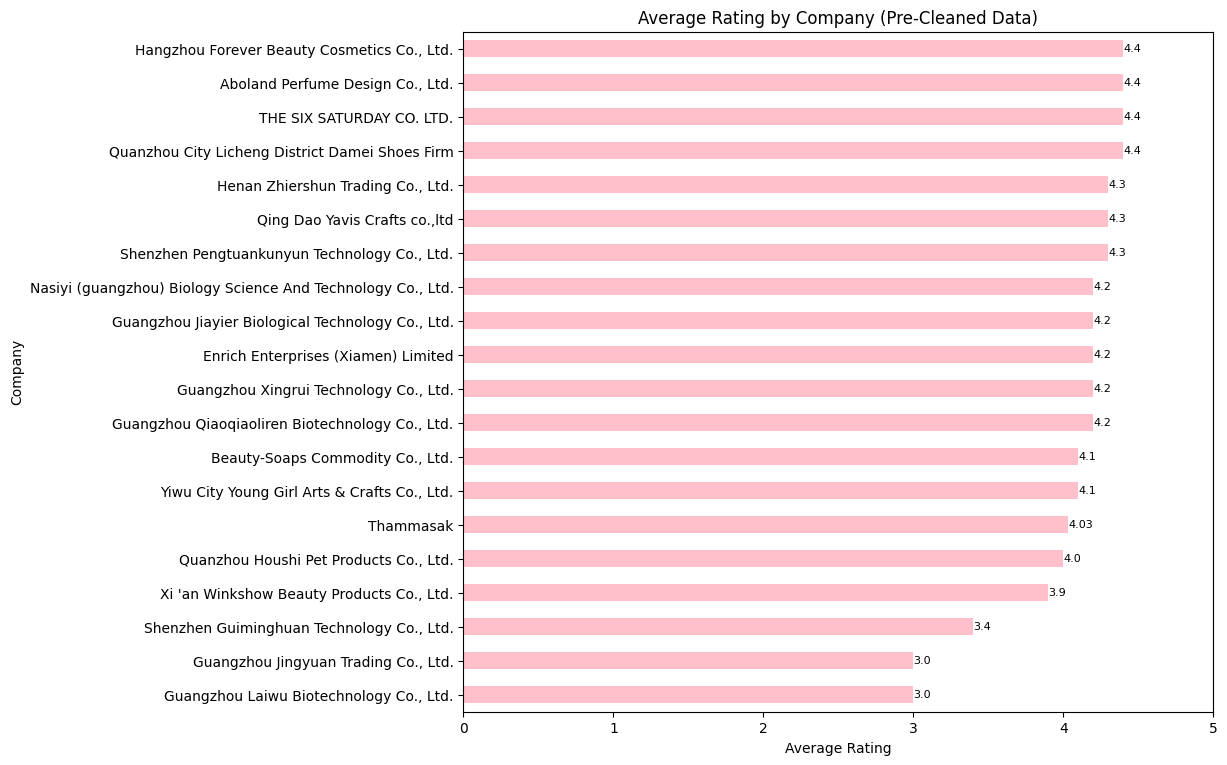

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load pre-cleaned dataset
file_path = "alibaba_perfume.csv"
df = pd.read_csv(file_path)

#Extract numeric part from 'Ratings' column
df['Ratings'] = df['Ratings'].str.extract(r'(\d+\.\d+)').astype(float)

#Filter out Company with no ratings
df= df.dropna(subset=['Ratings'])

# Calculate average rating by company
avg_rating_by_company = df.groupby('Company')['Ratings'].mean().sort_values()

#Show only the top N companies (In this case, N=20)
top_n_companies = 20

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = avg_rating_by_company[:top_n_companies].plot(kind='barh', color='pink')
plt.title('Average Rating by Company (Pre-Cleaned Data)')
plt.xlabel('Average Rating')
plt.ylabel('Company')

# Add text labels on the right of each bar for the top N companies
for i, (company, rating) in enumerate(avg_rating_by_company[:top_n_companies].items()):
    plt.text(rating, i, f'{round(rating, 2)}', va='center', fontsize=8)

# Set x-axis limits
ax.set_xlim(0, 5)

# Manually adjust margins
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

plt.show()


Horizontal Bar Chart for the Average Rating by Company using Cleaned Data

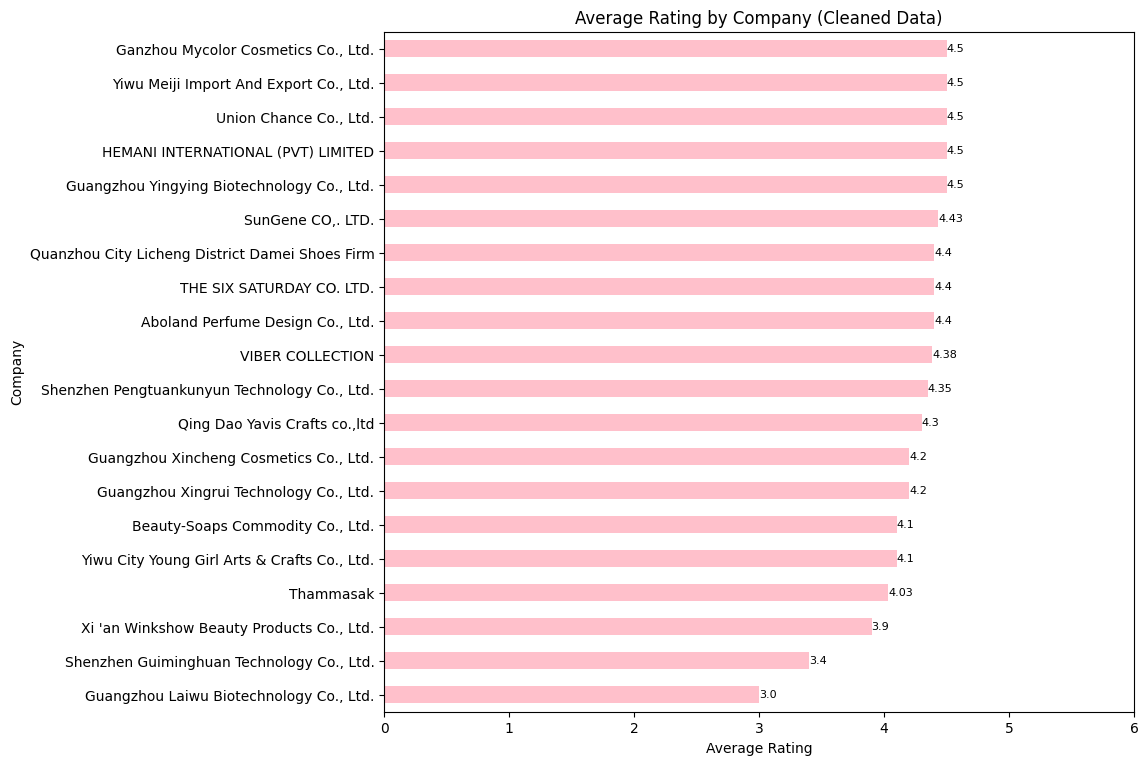

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = "alibaba_perfume_cleaned.csv"
df = pd.read_csv(file_path)

#Filter out Company with no ratings
df= df.dropna(subset=['Rating'])

# Calculate average rating by company
avg_rating_by_company = df.groupby('Company')['Rating'].mean().sort_values()

#Show only the top N companies (In this case, N=20)
top_n_companies = 20

# Plot the horizontal bar chart
plt.figure(figsize=(10, 8))
ax = avg_rating_by_company[:top_n_companies].plot(kind='barh', color='pink')
plt.title('Average Rating by Company (Cleaned Data)')
plt.xlabel('Average Rating')
plt.ylabel('Company')
#plt.xticks(rotation=45, ha='right')

# Add text labels on the right of each bar
for i, (company, rating) in enumerate(avg_rating_by_company[:top_n_companies].items()):
    plt.text(rating, i, f'{round(rating, 2)}', va='center', fontsize=8)

#Set x-axis limits
ax.set_xlim(0, 6)

# Manually adjust margins
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.1)

plt.show()


Pie Chart showing the proportion of
products originating from different countries (Pre-Cleaned Data)

Index(['Names', 'Price', 'Minimum', 'Company', 'Origin', 'Ratings',
       'Product Features List'],
      dtype='object')


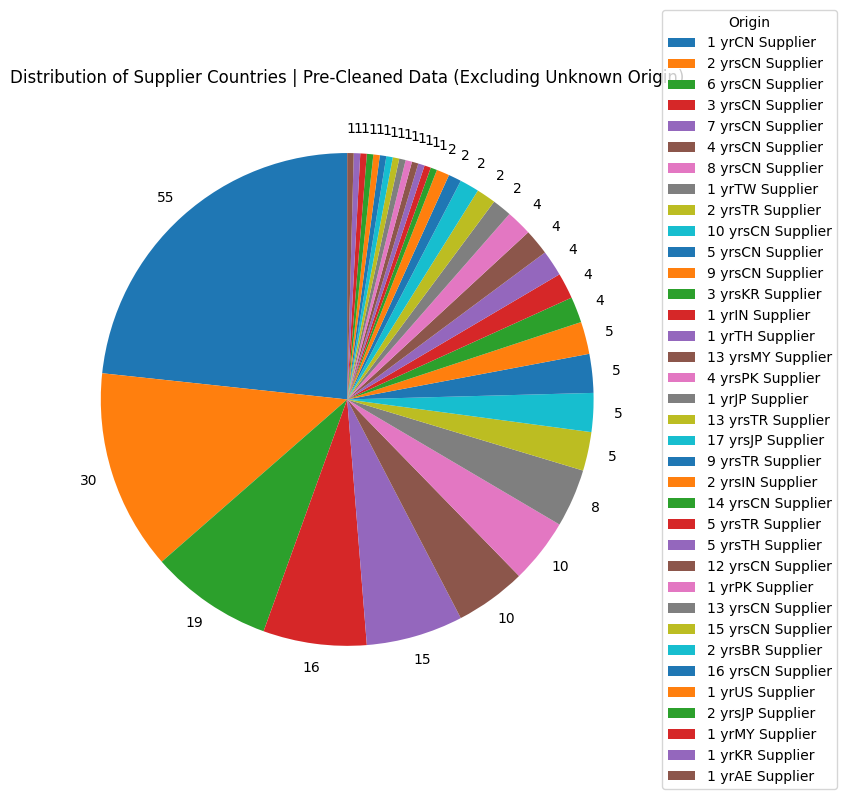

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from alibaba_perfume.csv
df = pd.read_csv('alibaba_perfume.csv')

# Check the columns to identify the relevant column for country of origin
print(df.columns)

# Remove rows with unknown origin
df= df[df['Origin'] != 'None']

# Assuming "Origin" is the relevant column for country of origin
# Replace "Origin" with the actual column name if it differs
country_counts = df['Origin'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts,
        labels=None,
        autopct=lambda p: f'{int(p * sum(country_counts) / 100)}',
        pctdistance=1.10,  # Adjust the distance of the labels
        startangle=90)

# Add a legend with origin labels
plt.legend(country_counts.index, title='Origin', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Supplier Countries | Pre-Cleaned Data (Excluding Unknown Origin)')
plt.show()


Pie Chart showing the proportion of
products originating from different countries (Cleaned Data)

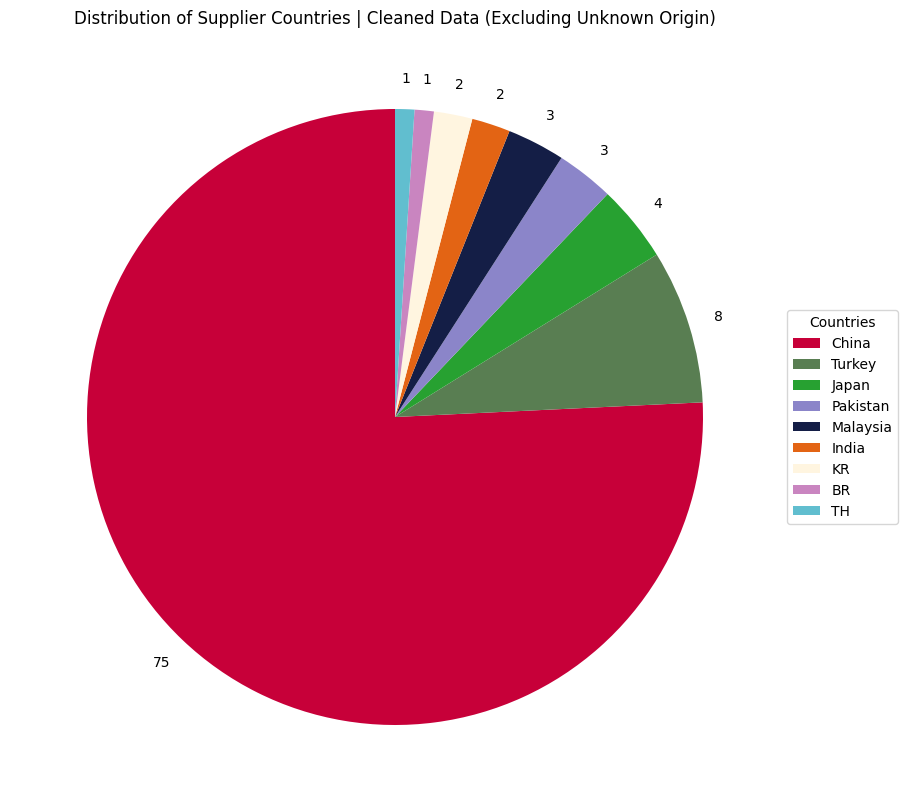

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path_cleaned = "alibaba_perfume_cleaned.csv"
df_cleaned = pd.read_csv(file_path_cleaned)

# Remove rows with unknown origin
df_cleaned_filtered = df_cleaned[df_cleaned['Supplier Country Origin'] != 'None']

# Check the unique values in the 'Supplier Country Origin' column
supplier_country_counts = df_cleaned_filtered['Supplier Country Origin'].value_counts()

# Create a dictionary to map each country to a specific color
country_colors = {
    'China': '#C70039',
    'Malaysia': '#141E46',
    'Japan' : '#27a131',
    'KR': '#FFF5E0',
    'Turkey': '#597E52',
    'Indonesia': '#FF6969',
    'India': '#E36414',
    'Pakistan': '#8b85c9',
    'BR': '#c985c0',
    'TH': '#61becf'
    # Add more countries and colors as needed
}

# Get the list of colors for each country
colors = [country_colors.get(country, 'gray') for country in supplier_country_counts.index]

# Plot a pie chart with different colors for each section
plt.figure(figsize=(10, 10))
plt.pie(
    supplier_country_counts,
    labels=None,
    autopct=lambda p: '{:.0f}'.format(p * sum(supplier_country_counts) / 100),  # Display actual counts
    startangle=90,
    explode=None,
    colors=colors,
    pctdistance=1.10,  # Adjust the distance of the labels
)

# Add a legend with country labels
plt.legend(supplier_country_counts.index, title='Countries', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Supplier Countries | Cleaned Data (Excluding Unknown Origin)')
plt.show()
